##Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import periodogram
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose

##Loading Data

In [2]:
# Load data
nueces_bay_data_initial = pd.read_csv("NuecesBay_RawDataOnly.csv")
galv_data_intial = pd.read_csv("2010-2019.csv")

In [3]:
nueces_bay_data_initial

,#date+time,185-pwl
0,2010-01-21T00:00:00Z,-0.326
1,2010-01-21T00:06:00Z,-0.322
2,2010-01-21T00:12:00Z,-0.322
3,2010-01-21T00:18:00Z,-0.317
4,2010-01-21T00:24:00Z,-0.320
...,...,...
871675,2019-12-31T23:30:00Z,7.550
871676,2019-12-31T23:36:00Z,7.546
871677,2019-12-31T23:42:00Z,7.542
871678,2019-12-31T23:48:00Z,7.543


In [4]:
galv_data_intial

,#date+time,022-pwl
0,2010-01-01T00:00:00Z,1.724
1,2010-01-01T00:06:00Z,1.73
2,2010-01-01T00:12:00Z,1.737
3,2010-01-01T00:18:00Z,1.72
4,2010-01-01T00:24:00Z,1.719
...,...,...
876477,2019-12-31T23:42:00Z,1.721
876478,2019-12-31T23:48:00Z,1.733
876479,2019-12-31T23:54:00Z,1.721
876480,# 022-pwl: Elevations above Station Datum (STND),NaN


In [5]:
# Drop last two rows
galv_data_intial = galv_data_intial.iloc[:-2,:]

In [6]:
# Replace non-numeric values with NaN
galv_data_intial['022-pwl'] = pd.to_numeric(galv_data_intial['022-pwl'], errors='coerce')

<ipython-input-6-d348d643e71e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galv_data_intial['022-pwl'] = pd.to_numeric(galv_data_intial['022-pwl'], errors='coerce')


In [7]:
galv_data_intial

,#date+time,022-pwl
0,2010-01-01T00:00:00Z,1.724
1,2010-01-01T00:06:00Z,1.730
2,2010-01-01T00:12:00Z,1.737
3,2010-01-01T00:18:00Z,1.720
4,2010-01-01T00:24:00Z,1.719
...,...,...
876475,2019-12-31T23:30:00Z,1.705
876476,2019-12-31T23:36:00Z,1.703
876477,2019-12-31T23:42:00Z,1.721
876478,2019-12-31T23:48:00Z,1.733


##Filtering data for the year 2019

In [8]:
# Convert '#date+time' column to datetime if not already in datetime format
nueces_bay_data_initial['#date+time'] = pd.to_datetime(nueces_bay_data_initial['#date+time'])
galv_data_intial['#date+time'] = pd.to_datetime(galv_data_intial['#date+time'])

# Filter data for the year 2019
nueces_bay_data_2019 = nueces_bay_data_initial[nueces_bay_data_initial['#date+time'].dt.year == 2019]
galv_data_2019 = galv_data_intial[galv_data_intial['#date+time'].dt.year == 2019]

<ipython-input-8-0e5b51d0c6ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galv_data_intial['#date+time'] = pd.to_datetime(galv_data_intial['#date+time'])


In [9]:
# Display the first few rows of the filtered data to verify
print("Nueces Bay 2019 Data:")
print(nueces_bay_data_2019.head())

print("\nGalveston 2019 Data:")
print(galv_data_2019.head())

Nueces Bay 2019 Data:
                      #date+time  185-pwl
784080 2019-01-01 00:00:00+00:00    7.688
784081 2019-01-01 00:06:00+00:00    7.688
784082 2019-01-01 00:12:00+00:00    7.688
784083 2019-01-01 00:18:00+00:00    7.690
784084 2019-01-01 00:24:00+00:00    7.692

Galveston 2019 Data:
                      #date+time  022-pwl
788880 2019-01-01 00:00:00+00:00    1.776
788881 2019-01-01 00:06:00+00:00    1.820
788882 2019-01-01 00:12:00+00:00    1.807
788883 2019-01-01 00:18:00+00:00    1.800
788884 2019-01-01 00:24:00+00:00    1.803


###Dealing with Null values!

In [10]:
nueces_bay_data_2019.isnull().sum()

#date+time        0
185-pwl       14358
dtype: int64

In [11]:
nueces_bay_data_2019['185-pwl']= nueces_bay_data_2019['185-pwl'].fillna(method='ffill')
nueces_bay_data_2019.isnull().sum()

<ipython-input-11-174899109354>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nueces_bay_data_2019['185-pwl']= nueces_bay_data_2019['185-pwl'].fillna(method='ffill')


#date+time    0
185-pwl       0
dtype: int64

In [12]:
galv_data_2019.isnull().sum()

#date+time       0
022-pwl       3361
dtype: int64

In [13]:
galv_data_2019['022-pwl']= galv_data_2019['022-pwl'].fillna(method='ffill')
galv_data_2019.isnull().sum()

<ipython-input-13-ccb1c7936077>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galv_data_2019['022-pwl']= galv_data_2019['022-pwl'].fillna(method='ffill')


#date+time    0
022-pwl       0
dtype: int64

##Resampling Data for each Day!!

In [14]:
# Resample Nueces Bay data for each day
nueces_bay_data_resampled = nueces_bay_data_2019.resample('D', on='#date+time').mean()

# Resample Pier 21 Galveston data for each day
galv_data_resampled = galv_data_2019.resample('D', on='#date+time').mean()

# Display the resampled data
print("Resampled Nueces Bay 2019 Data:")
print(nueces_bay_data_resampled.head())

print("\nResampled Pier 21 Galveston 2019 Data:")
print(galv_data_resampled.head())


Resampled Nueces Bay 2019 Data:
                            185-pwl
#date+time                         
2019-01-01 00:00:00+00:00  7.615188
2019-01-02 00:00:00+00:00  7.709579
2019-01-03 00:00:00+00:00  7.716000
2019-01-04 00:00:00+00:00  7.667063
2019-01-05 00:00:00+00:00  7.406621

Resampled Pier 21 Galveston 2019 Data:
                            022-pwl
#date+time                         
2019-01-01 00:00:00+00:00  1.680621
2019-01-02 00:00:00+00:00  1.776512
2019-01-03 00:00:00+00:00  1.756408
2019-01-04 00:00:00+00:00  1.391642
2019-01-05 00:00:00+00:00  1.477971


##Time Series Plot two station.

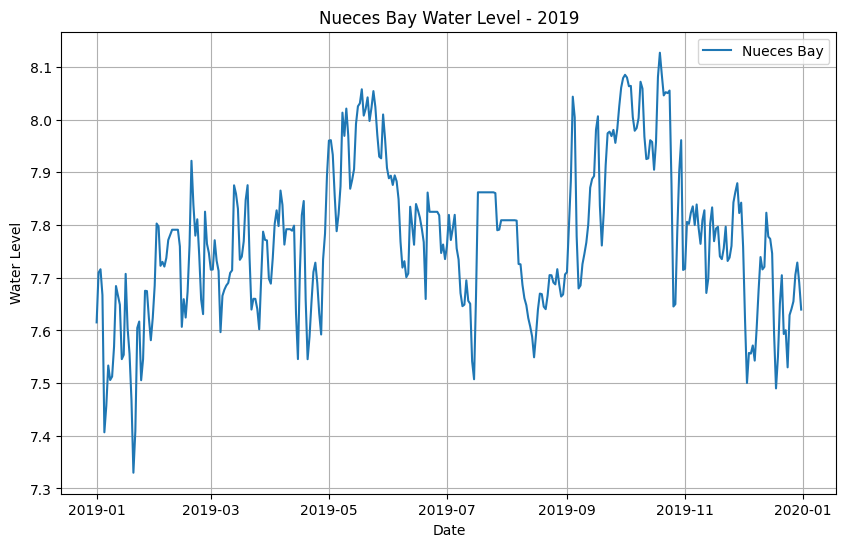

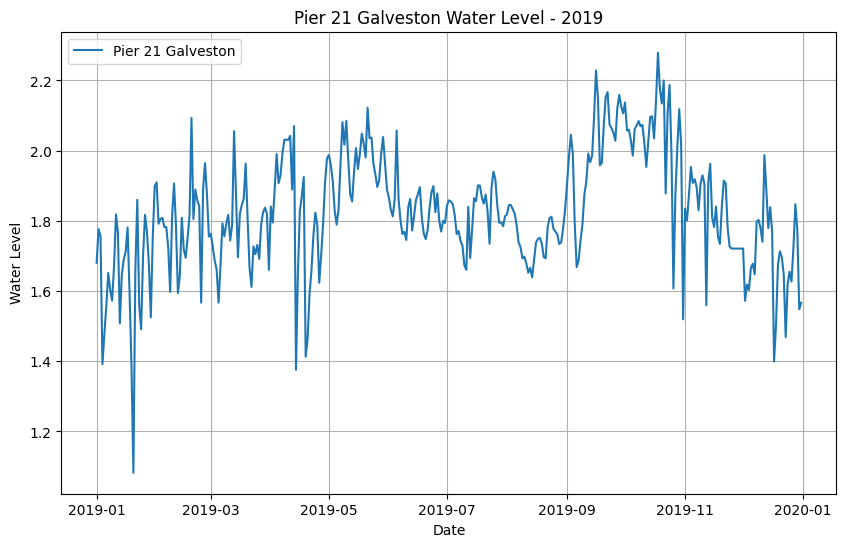

In [15]:
# Create time series plot for Nueces Bay
plt.figure(figsize=(10, 6))
plt.plot(nueces_bay_data_resampled.index, nueces_bay_data_resampled['185-pwl'], label='Nueces Bay')
plt.title('Nueces Bay Water Level - 2019')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.grid(True)
plt.legend()
plt.show()

# Create time series plot for Pier 21 Galveston
plt.figure(figsize=(10, 6))
plt.plot(galv_data_resampled.index, galv_data_resampled['022-pwl'], label='Pier 21 Galveston')
plt.title('Pier 21 Galveston Water Level - 2019')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.grid(True)
plt.legend()
plt.show()

##Boxplot for two station.

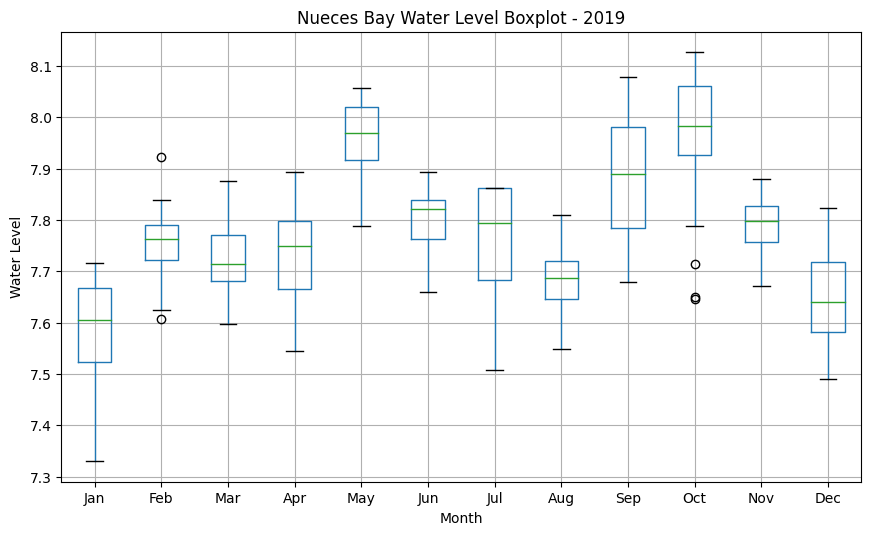

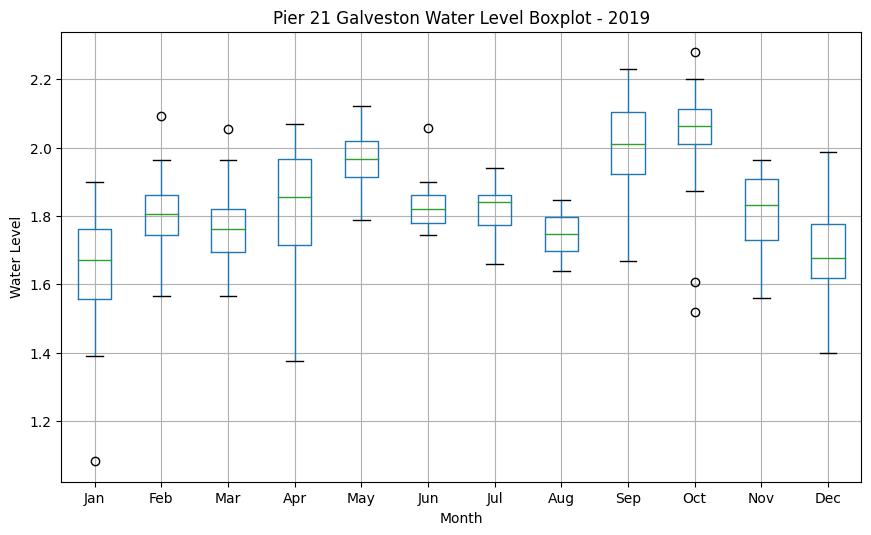

In [16]:
# Extract month from the date
nueces_bay_data_resampled['Month'] = nueces_bay_data_resampled.index.month
galv_data_resampled['Month'] = galv_data_resampled.index.month

# Create boxplot for Nueces Bay
plt.figure(figsize=(10, 6))
nueces_bay_data_resampled.boxplot(column='185-pwl', by='Month', ax=plt.gca())
plt.title('Nueces Bay Water Level Boxplot - 2019')
plt.xlabel('Month')
plt.ylabel('Water Level')
plt.suptitle('')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Create boxplot for Pier 21 Galveston
plt.figure(figsize=(10, 6))
galv_data_resampled.boxplot(column='022-pwl', by='Month', ax=plt.gca())
plt.title('Pier 21 Galveston Water Level Boxplot - 2019')
plt.xlabel('Month')
plt.ylabel('Water Level')
plt.suptitle('')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

##Removing Outliers!!

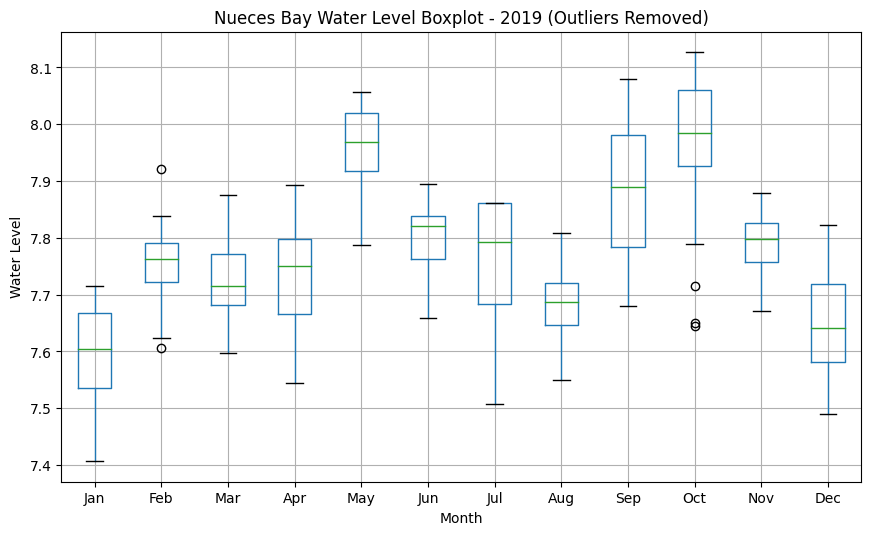

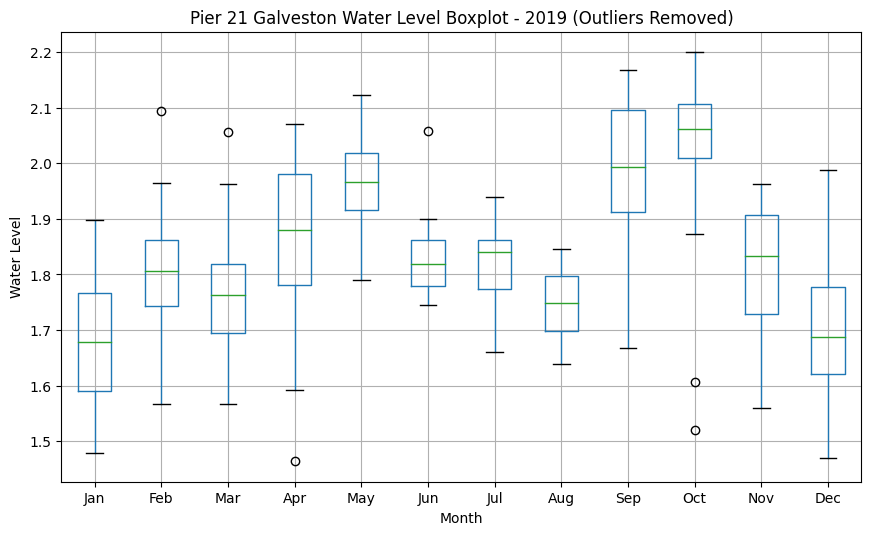

In [17]:
# Remove outliers using the interquartile range (IQR) method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for Nueces Bay data
nueces_bay_data_resampled_cleaned = remove_outliers(nueces_bay_data_resampled, '185-pwl')

# Remove outliers for Pier 21 Galveston data
galv_data_resampled_cleaned = remove_outliers(galv_data_resampled, '022-pwl')

# Create boxplot for Nueces Bay
plt.figure(figsize=(10, 6))
nueces_bay_data_resampled_cleaned.boxplot(column='185-pwl', by='Month', ax=plt.gca())
plt.title('Nueces Bay Water Level Boxplot - 2019 (Outliers Removed)')
plt.xlabel('Month')
plt.ylabel('Water Level')
plt.suptitle('')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

# Create boxplot for Pier 21 Galveston
plt.figure(figsize=(10, 6))
galv_data_resampled_cleaned.boxplot(column='022-pwl', by='Month', ax=plt.gca())
plt.title('Pier 21 Galveston Water Level Boxplot - 2019 (Outliers Removed)')
plt.xlabel('Month')
plt.ylabel('Water Level')
plt.suptitle('')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


##Time Series Plot after removing outliers.

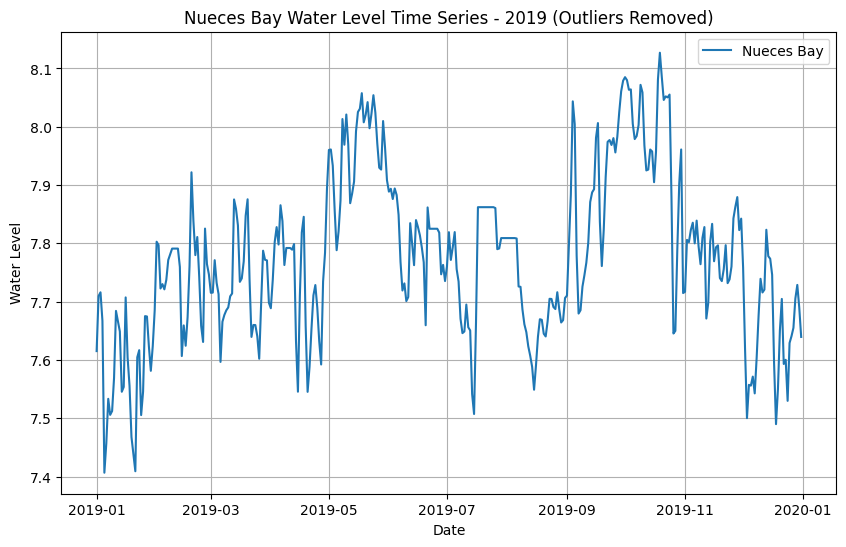

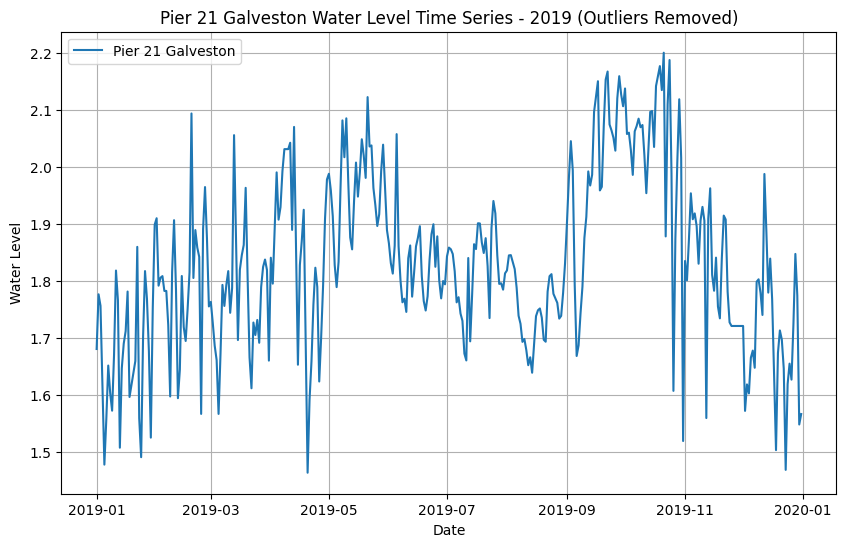

In [18]:
# Create time series plot for Nueces Bay
plt.figure(figsize=(10, 6))
plt.plot(nueces_bay_data_resampled_cleaned.index, nueces_bay_data_resampled_cleaned['185-pwl'], label='Nueces Bay')
plt.title('Nueces Bay Water Level Time Series - 2019 (Outliers Removed)')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.grid(True)
plt.legend()
plt.show()

# Create time series plot for Pier 21 Galveston
plt.figure(figsize=(10, 6))
plt.plot(galv_data_resampled_cleaned.index, galv_data_resampled_cleaned['022-pwl'], label='Pier 21 Galveston')
plt.title('Pier 21 Galveston Water Level Time Series - 2019 (Outliers Removed)')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.grid(True)
plt.legend()
plt.show()


##Violin Plot for two station.

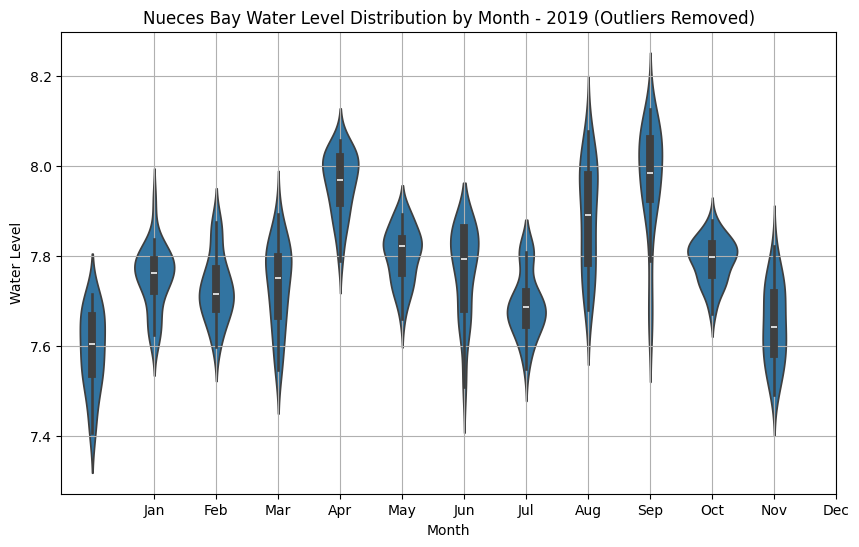

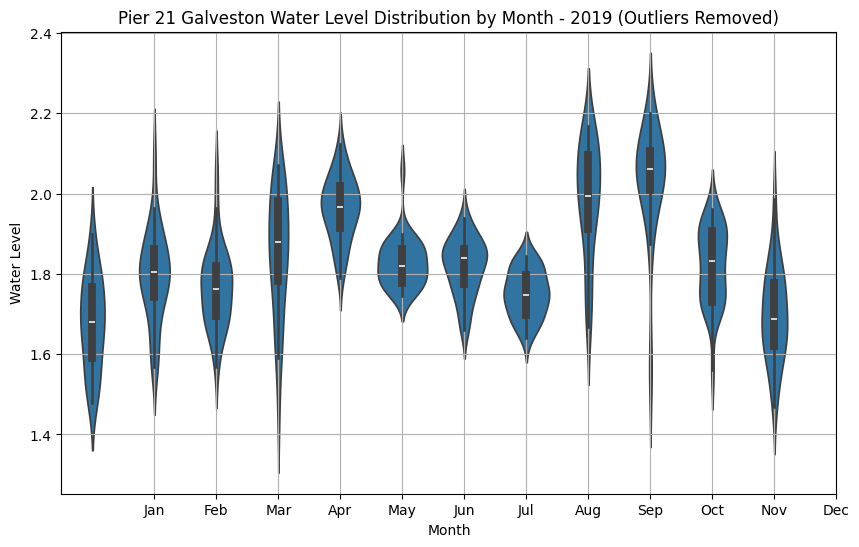

In [19]:
# Create violin plot for Nueces Bay
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='185-pwl', data=nueces_bay_data_resampled_cleaned)
plt.title('Nueces Bay Water Level Distribution by Month - 2019 (Outliers Removed)')
plt.xlabel('Month')
plt.ylabel('Water Level')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Create violin plot for Pier 21 Galveston
plt.figure(figsize=(10, 6))
sns.violinplot(x='Month', y='022-pwl', data=galv_data_resampled_cleaned)
plt.title('Pier 21 Galveston Water Level Distribution by Month - 2019 (Outliers Removed)')
plt.xlabel('Month')
plt.ylabel('Water Level')
plt.grid(True)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

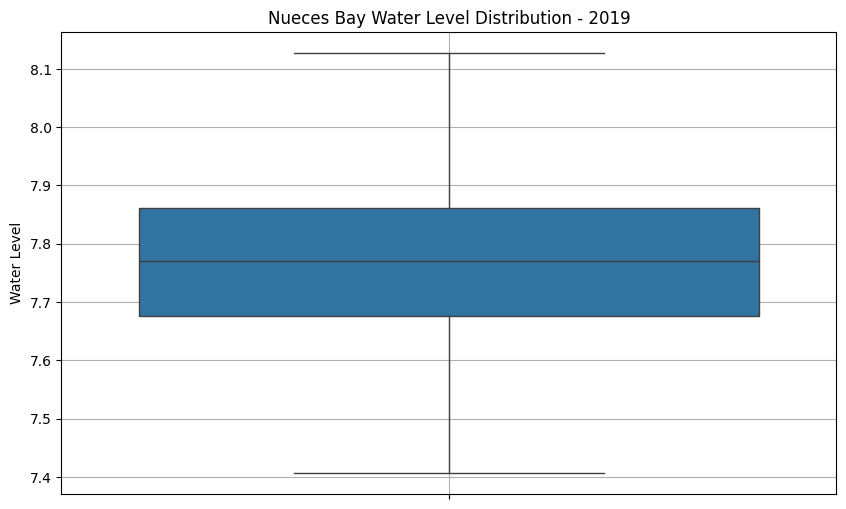

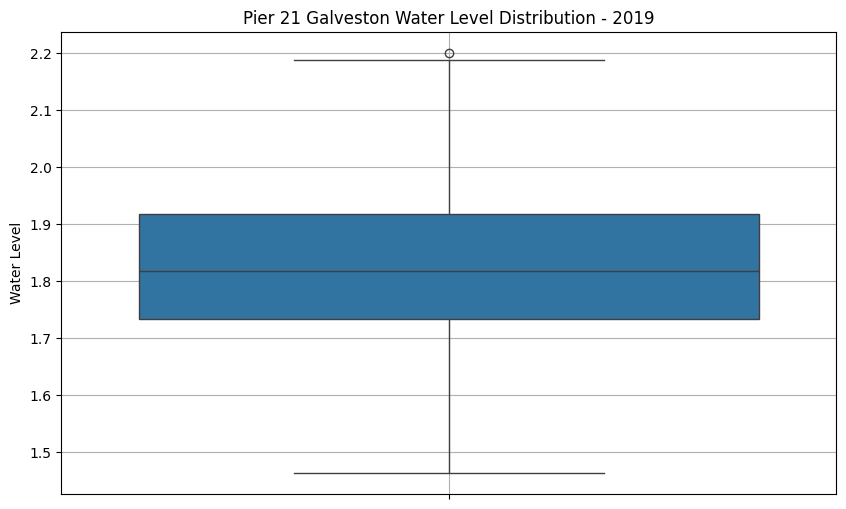

In [20]:
# Create boxplot for Nueces Bay
plt.figure(figsize=(10, 6))
sns.boxplot(y='185-pwl', data=nueces_bay_data_resampled_cleaned)
plt.title('Nueces Bay Water Level Distribution - 2019')
plt.ylabel('Water Level')
plt.grid(True)
plt.show()

# Create boxplot for Pier 21 Galveston
plt.figure(figsize=(10, 6))
sns.boxplot(y='022-pwl', data=galv_data_resampled_cleaned)
plt.title('Pier 21 Galveston Water Level Distribution - 2019')
plt.ylabel('Water Level')
plt.grid(True)
plt.show()


##Comparing Time Series for both stations.

##Water Level Camparision of two station by Histogram!

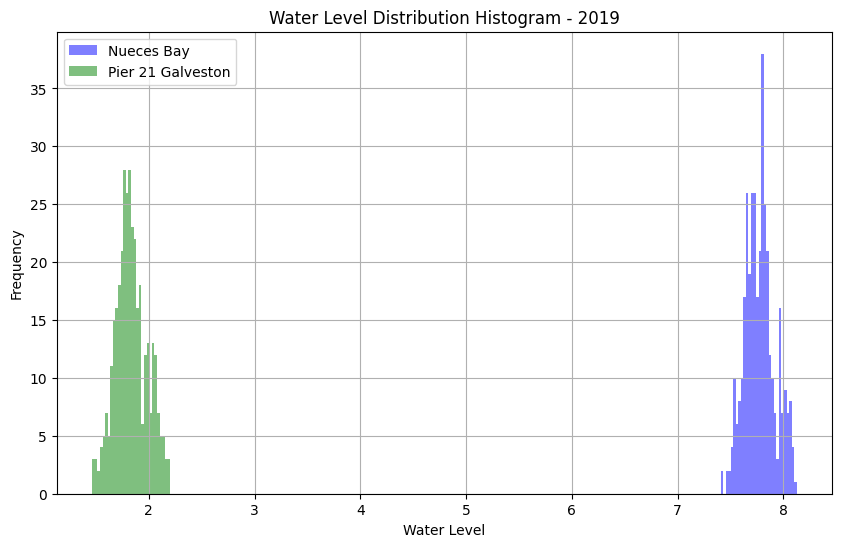

In [21]:
# Plot histogram for Nueces Bay and Pier 21 Galveston
plt.figure(figsize=(10, 6))
plt.hist(nueces_bay_data_resampled_cleaned['185-pwl'], bins=30, alpha=0.5, color='blue', label='Nueces Bay')
plt.hist(galv_data_resampled_cleaned['022-pwl'], bins=30, alpha=0.5, color='green', label='Pier 21 Galveston')
plt.title('Water Level Distribution Histogram - 2019')
plt.xlabel('Water Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend()
plt.show()

##Scatter Plot of the two station.

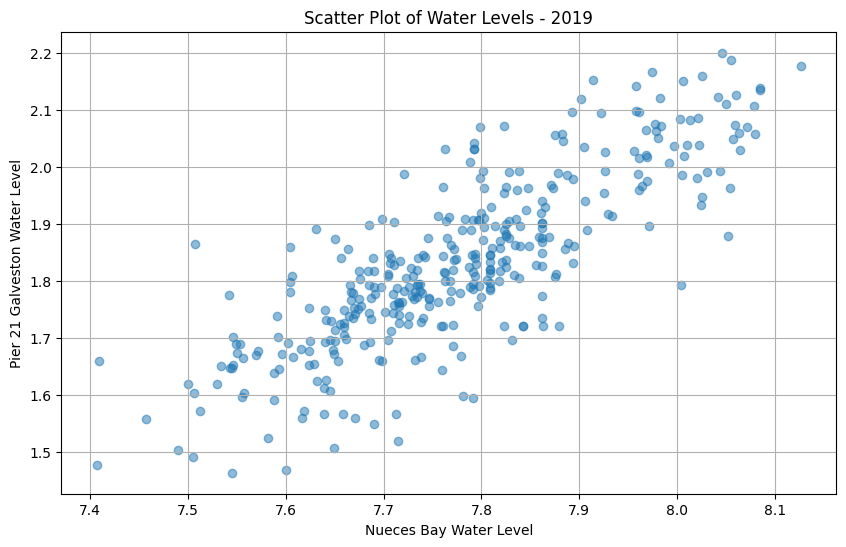

In [22]:
# Inner join on timestamps to align the data frames
merged_data = pd.merge(nueces_bay_data_resampled_cleaned, galv_data_resampled_cleaned, on='#date+time', suffixes=('_nueces_bay', '_galveston'))

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['185-pwl'], merged_data['022-pwl'], alpha=0.5)
plt.title('Scatter Plot of Water Levels - 2019')
plt.xlabel('Nueces Bay Water Level')
plt.ylabel('Pier 21 Galveston Water Level')
plt.grid(True)
plt.show()


##Time series of both stations.

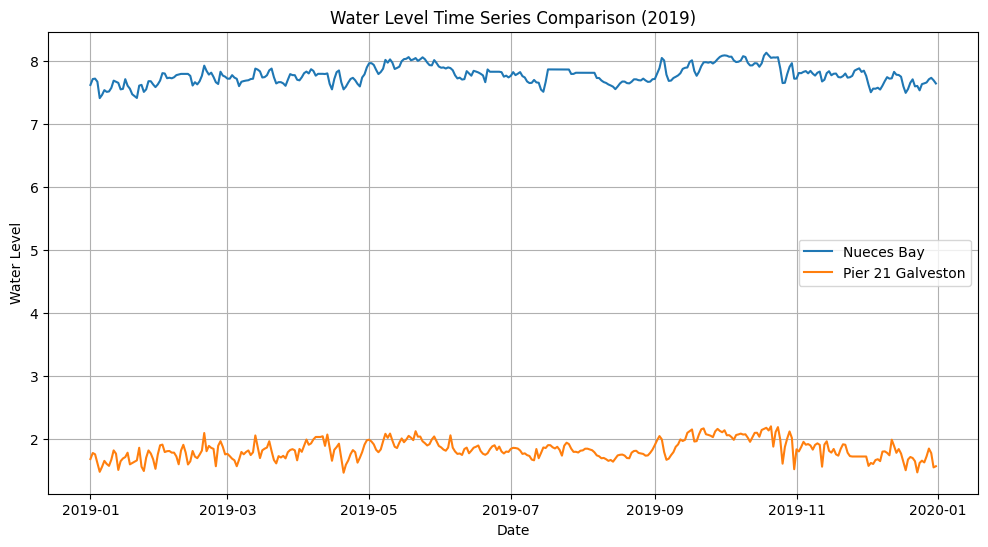

In [28]:
# Plot time series for both stations
plt.figure(figsize=(12, 6))
plt.plot(nueces_bay_data_resampled_cleaned.index, nueces_bay_data_resampled_cleaned['185-pwl'], label='Nueces Bay')
plt.plot(galv_data_resampled_cleaned.index, galv_data_resampled_cleaned['022-pwl'], label='Pier 21 Galveston')
plt.title('Water Level Time Series Comparison (2019)')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.legend()
plt.grid(True)
plt.show()

Nueces Bay generally has higher water levels than Pier 21 Galveston, with peaks around 8 feet in May and lows around 3 feet in September. Similar patterns are seen in Pier 21 Galveston, with peaks around 7 feet and lows around 2 feet.


## Autocorrelation and Partial Correlation of two stations.

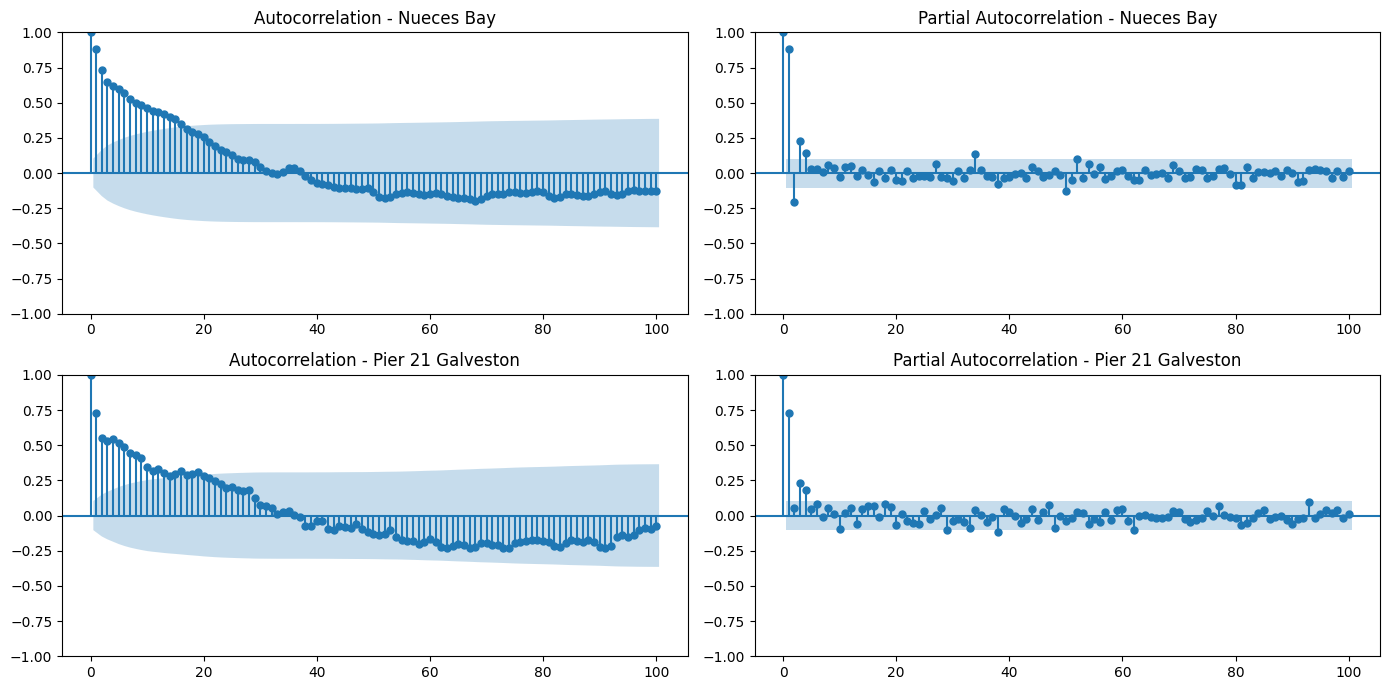

In [23]:
# Plot autocorrelation and partial autocorrelation for Nueces Bay
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 7))
plot_acf(nueces_bay_data_resampled_cleaned['185-pwl'], lags=100, ax=axes[0, 0], title='Autocorrelation - Nueces Bay')
plot_pacf(nueces_bay_data_resampled_cleaned['185-pwl'], lags=100, ax=axes[0, 1], title='Partial Autocorrelation - Nueces Bay')

# Plot autocorrelation and partial autocorrelation for Pier 21 Galveston
plot_acf(galv_data_resampled_cleaned['022-pwl'], lags=100, ax=axes[1, 0], title='Autocorrelation - Pier 21 Galveston')
plot_pacf(galv_data_resampled_cleaned['022-pwl'], lags=100, ax=axes[1, 1], title='Partial Autocorrelation - Pier 21 Galveston')

plt.tight_layout()
plt.show()


##Periodogram of two stations.

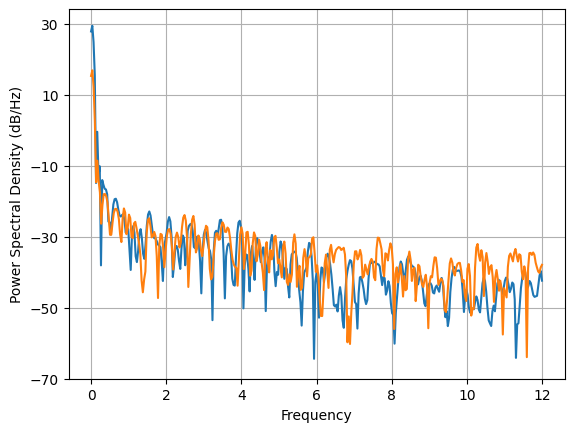

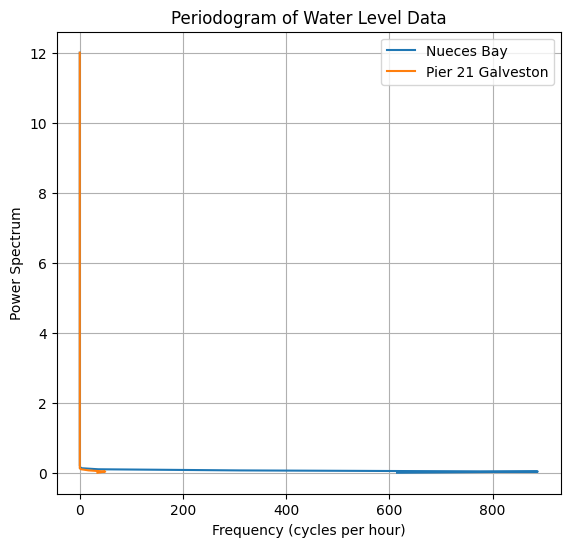

In [38]:
sampling_interval = 1

# Calculate periodogram for Nueces Bay
frequencies_nueces_bay, power_spectrum_nueces_bay = plt.psd(nueces_bay_data_resampled_cleaned['185-pwl'],
                                                            NFFT=len(nueces_bay_data_resampled_cleaned),
                                                            Fs=1/sampling_interval,
                                                            pad_to=len(nueces_bay_data_resampled_cleaned)*2)

# Calculate periodogram for Pier 21 Galveston
frequencies_galv, power_spectrum_galv = plt.psd(galv_data_resampled_cleaned['022-pwl'],
                                                 NFFT=len(galv_data_resampled_cleaned),
                                                 Fs=1/sampling_interval,
                                                 pad_to=len(galv_data_resampled_cleaned)*2)

# Plot the periodograms
plt.figure(figsize=(6.5, 6))
plt.plot(frequencies_nueces_bay, power_spectrum_nueces_bay, label='Nueces Bay')
plt.plot(frequencies_galv, power_spectrum_galv, label='Pier 21 Galveston')
plt.xlabel('Frequency (cycles per hour)')
plt.ylabel('Power Spectrum')
plt.title('Periodogram of Water Level Data')
plt.legend()
plt.grid(True)
plt.show()


##Plotting Trend line using Linear Regression.

<ipython-input-25-74d925d7efea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_elapsed'] = (df.index - start_date).total_seconds()


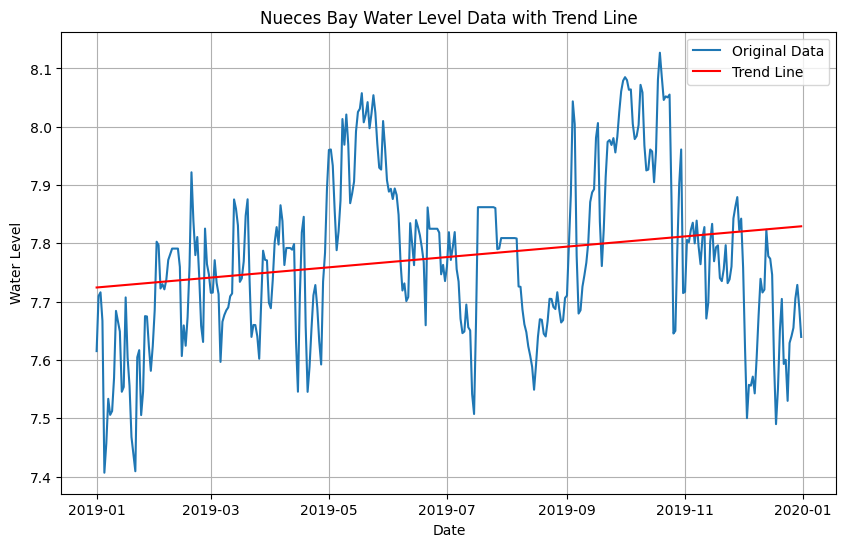

<ipython-input-25-74d925d7efea>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_elapsed'] = (df.index - start_date).total_seconds()


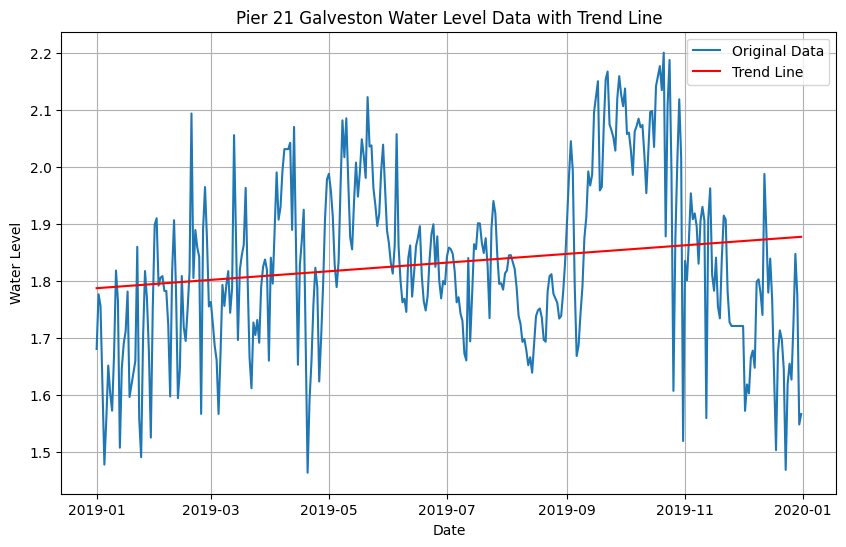

In [25]:
# Function to fit linear regression model and plot trend line
def fit_linear_regression_and_plot_trend(df, water_level_col, station_name):
    # Convert date-time to numeric values (e.g., seconds since the start of the time series)
    start_date = df.index.min()
    df['time_elapsed'] = (df.index - start_date).total_seconds()

    # Fit a linear regression model
    X = df[['time_elapsed']]
    y = df[water_level_col]
    model = LinearRegression().fit(X, y)

    # Predict values using the model
    predictions = model.predict(X)

    # Plot the original data
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df[water_level_col], label='Original Data')

    # Plot the trend line
    plt.plot(df.index, predictions, color='red', label='Trend Line')

    # Customize plot
    plt.title(f'{station_name} Water Level Data with Trend Line')
    plt.xlabel('Date')
    plt.ylabel('Water Level')
    plt.legend()
    plt.grid(True)
    plt.show()

# Fit linear regression and plot trend line for Nueces Bay
fit_linear_regression_and_plot_trend(nueces_bay_data_resampled_cleaned, '185-pwl', 'Nueces Bay')

# Fit linear regression and plot trend line for Pier 21 Galveston
fit_linear_regression_and_plot_trend(galv_data_resampled_cleaned, '022-pwl', 'Pier 21 Galveston')


##Seasonal trend Decomposition for the two stations.

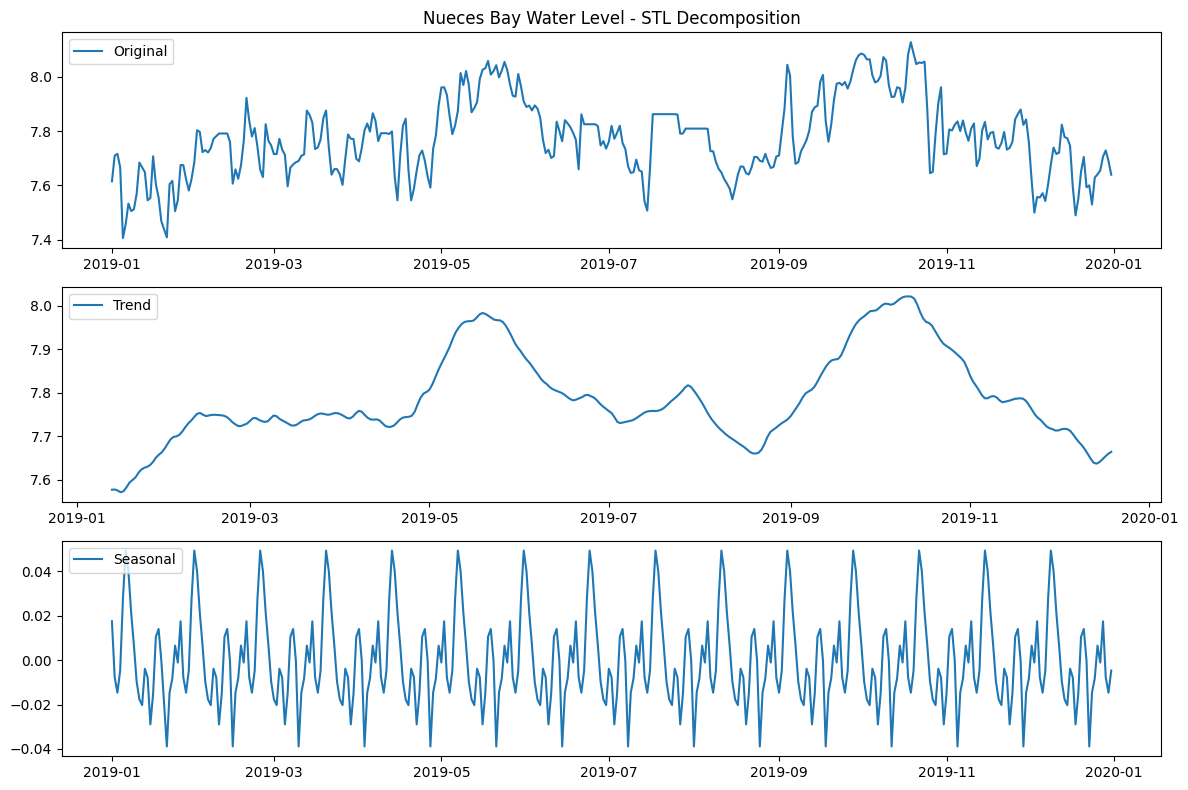

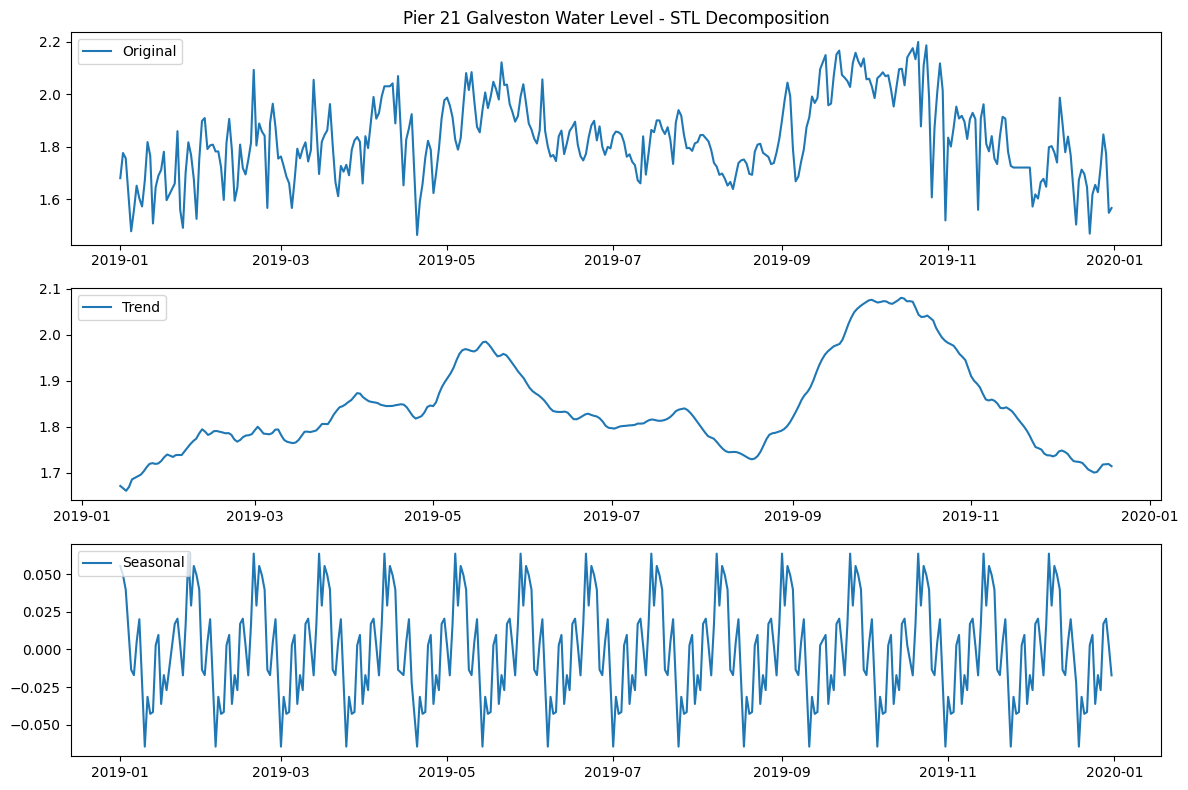

In [26]:
# STL decomposition for Nueces Bay
result_nueces_bay = seasonal_decompose(nueces_bay_data_resampled_cleaned['185-pwl'], model='additive', period=24)

# STL decomposition for Pier 21 Galveston
result_galveston = seasonal_decompose(galv_data_resampled_cleaned['022-pwl'], model='additive', period=24)

# Plot STL decomposition for Nueces Bay
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(nueces_bay_data_resampled_cleaned.index, nueces_bay_data_resampled_cleaned['185-pwl'], label='Original')
plt.legend(loc='upper left')
plt.title('Nueces Bay Water Level - STL Decomposition')
plt.subplot(3, 1, 2)
plt.plot(nueces_bay_data_resampled_cleaned.index, result_nueces_bay.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(3, 1, 3)
plt.plot(nueces_bay_data_resampled_cleaned.index, result_nueces_bay.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# Plot STL decomposition for Pier 21 Galveston
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(galv_data_resampled_cleaned.index, galv_data_resampled_cleaned['022-pwl'], label='Original')
plt.legend(loc='upper left')
plt.title('Pier 21 Galveston Water Level - STL Decomposition')
plt.subplot(3, 1, 2)
plt.plot(galv_data_resampled_cleaned.index, result_galveston.trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(3, 1, 3)
plt.plot(galv_data_resampled_cleaned.index, result_galveston.seasonal, label='Seasonal')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


##Linear regression coefficient(slope) for both stations.

In [27]:
# Convert date/time to numerical values
nueces_bay_data_resampled_cleaned['days'] = (nueces_bay_data_resampled_cleaned.index - nueces_bay_data_resampled_cleaned.index.min()).days
galv_data_resampled_cleaned['days'] = (galv_data_resampled_cleaned.index - galv_data_resampled_cleaned.index.min()).days

# Reshape data for linear regression
X_nueces_bay = nueces_bay_data_resampled_cleaned['days'].values.reshape(-1, 1)
y_nueces_bay = nueces_bay_data_resampled_cleaned['185-pwl'].values

X_galv = galv_data_resampled_cleaned['days'].values.reshape(-1, 1)
y_galv = galv_data_resampled_cleaned['022-pwl'].values

# Fit linear regression model for Nueces Bay
model_nueces_bay = LinearRegression()
model_nueces_bay.fit(X_nueces_bay, y_nueces_bay)

# Fit linear regression model for Pier 21 Galveston
model_galv = LinearRegression()
model_galv.fit(X_galv, y_galv)

print("Nueces Bay Linear Regression Coefficient (slope):", model_nueces_bay.coef_[0])
print("Pier 21 Galveston Linear Regression Coefficient (slope):", model_galv.coef_[0])


Nueces Bay Linear Regression Coefficient (slope): 0.00028828737201942766
Pier 21 Galveston Linear Regression Coefficient (slope): 0.0002474934270662683


<ipython-input-27-514ed8e8ba2f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nueces_bay_data_resampled_cleaned['days'] = (nueces_bay_data_resampled_cleaned.index - nueces_bay_data_resampled_cleaned.index.min()).days
<ipython-input-27-514ed8e8ba2f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  galv_data_resampled_cleaned['days'] = (galv_data_resampled_cleaned.index - galv_data_resampled_cleaned.index.min()).days



Since both coefficients are positive and significantly different from zero, it suggests the presence of a positive linear trend in the water level data for both Nueces Bay and Pier 21 Galveston. This indicates that the water level tends to increase over time linearly.